In [35]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
def one_hot(x):
    return np.identity(16)[x:x+1]

In [37]:
env =  gym.make('FrozenLake-v0')

[2018-07-10 08:40:30,244] Making new env: FrozenLake-v0


In [38]:
input_size = env.observation_space.n 
output_size = env.action_space.n
learing_rate = 0.1

In [39]:
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32) # actual training examples
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01)) #  trainable variables

In [40]:
Qpred = tf.matmul(X,W)
Y = tf.placeholder(shape=[1, output_size],dtype=tf.float32)

In [41]:
loss = tf.reduce_sum(tf.square(Y - Qpred))

In [42]:
train = tf.train.GradientDescentOptimizer(learning_rate= learing_rate).minimize(loss)

In [43]:
dis = 0.99
num_episodes = 2000

In [44]:
rList = []

In [45]:
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess :
    sess.run(init)
    for i in range(num_episodes) : 
        s = env.reset()
        e = 1./ ((i/50) + 10)
        rAll = 0
        done = False
        local_loss = []
        
        while not done :
            Qs = sess.run(Qpred, feed_dict = {X:one_hot(s)})
            if np.random.rand(1) < e : 
                a = env.action_space.sample()
            else :
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            if done: 
                Qs[0,a] = reward
            else : 
                Qs1 = sess.run(Qpred, feed_dict={X : one_hot(s1)})
                Qs[0,a] = reward + dis * np.max(Qs1)
            
            sess.run(train, feed_dict = {X : one_hot(s),Y:Qs})
            
            rAll += reward
            s = s1    
        rList.append(rAll)

Percent of successful episodes:0.798%


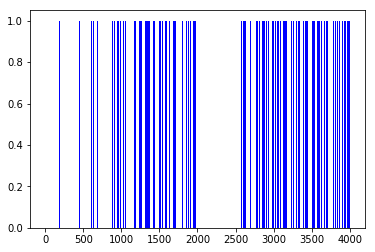

In [51]:
print("Percent of successful episodes:" + str(sum(rList)/num_episodes) + "%")
plt.bar(range(len(rList)) , rList, color = "blue")
plt.show()